In [1]:
import numpy as np
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import matplotlib.pyplot as plt
from module import * 

π=np.pi
G=4.4959e-15           #in units of M☉^-1 pc^3 yr^-2
c=0.3068               #in units of pc yr^-1
yr=3.154e7             # in units of seconds
pc=3.0857e16           # in meters

            
ρ_eq=3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_eq = 1.59246e12/yr      # in units of seconds
t   = 13.78e9               #in units of yrs corresponding to t_0=13.78Gyr
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr


σ_eq=0.005
ρ_m=4e19             #ρ_m=4e19 M☉ Gpc^-3


m_1=6   #in units of M☉
m_2=8   #in units of M☉

y_1=math.log(m_1)
y_2=math.log(m_2)
dy=(y_2-y_1)


y_list=np.zeros(10)

for i in range(len(y_list)):
    y_list[i]= (y_1+(i*dy))
    

M_1_list=np.zeros(len(y_list))
M_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i]=(math.ceil(math.exp(y)))
    M_2_list[i]=(math.ceil(math.exp(y)))
    

            
m_1_list=[int(M_1) for M_1 in M_1_list]
m_2_list=[int(M_2) for M_2 in M_2_list]

    
Δ_1_list=np.zeros(len(y_list))
Δ_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = math.exp(y + 0.5*dy)-math.exp(y - 0.5*dy)
    Δ_2_list[i] = math.exp(y + 0.5*dy)-math.exp(y - 0.5*dy) 

print("m_1=",m_1_list)
print("Δ_1", Δ_1_list)

m_1= [6, 8, 11, 15, 19, 26, 34, 45, 60, 80]
Δ_1 [ 1.73205081  2.30940108  3.07920144  4.10560191  5.47413589  7.29884785
  9.73179713 12.97572951 17.30097268 23.06796357]


In [11]:
m_1 = m_1_list[-1]
m_2 = m_2_list[-2]
Δ_1 = Δ_1_list[-1]
Δ_2 = Δ_2_list[-2]






f_pbh = 3.7e-3
f = 0.85*f_pbh 
        
def P(m):               #Log-Normal PBH mass Distribution
    σ=0.6
    m_c=15               #in units of M☉
    return  np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))/(σ*m*np.sqrt(2*π))





def Y_max(m_1, m_2, Δ_1, Δ_2):
    
    λ_max = λ_list[-1]
    
    k=19.4965 

    A=((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def X_max(m_1, m_2, Δ_1, Δ_2):
        return λ_max  * f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)
    
    def B(m_1,m_2,Δ_1,Δ_2):
        return (A**(1/7)) * ((m_1 * m_2 * t* ((m_1+m_2)**(-1/3)))**(1/7))* ((f**2 + 1.2009*(σ_eq**2))**(-1/2)) * ((f_b(m_1,m_2))**(37/21)) * ((Δ_1*Δ_2)**(37/42))
    

    return B(m_1,m_2,Δ_1,Δ_2) * ((X_max(m_1,m_2,Δ_1,Δ_2))**(-37/21))


print("Y_max=" ,Y_max(m_1,m_2,Δ_1,Δ_2)) 
    


    
#Integrand for binaries without halos.
def integrand(Y):
    k=19.4965 

    A=((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def μ(m_1,m_2,Δ_1,Δ_2):
        return   (2 * m_1 * m_2 * f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))/((m_1+m_2) * ((f_(m_2)*Δ_2 * m_1) + (f_(m_1)*Δ_1 * m_2)))

    
    def B(m_1,m_2,Δ_1,Δ_2):
        return (A**(1/7)) * ((m_1 * m_2 * t* ((m_1+m_2)**(-1/3)))**(1/7))* ((f**2 + 1.2009*(σ_eq**2))**(-1/2)) * ((f_b(m_1,m_2))**(37/21)) * ((Δ_1*Δ_2)**(37/42))
    
    def D(m_1,m_2,Δ_1,Δ_2):
        return (B(m_1,m_2,Δ_1,Δ_2)**(21/37))/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))  
    
    def γ_X(Y,m_1,m_2,Δ_1,Δ_2):      #eq.(12) in the notes.
        return ((((1 + 0.1709 * D(m_1,m_2,Δ_1,Δ_2) * (Y**(-21/37)))**(-1/14))/( 1 + 0.0136 * D(m_1,m_2,Δ_1,Δ_2) * (Y**(-21/37))))*Y)

    def PDF(m):
        return (P(m)/m)

    I = quad(PDF, 5, np.inf)  # Taking limits of the PBH mass from 5 M☉ to 100 M☉ instead of 
                               # 0 to infinity.
    
    n_T = f*ρ_eq*I[0]         #n_T=f*ρ_eq∫(P(m)/m)*dm 
   
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
    
    
    
    return (Y**(-58/37)) * np.exp(-((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * ((Y/B(m_1,m_2,Δ_1,Δ_2))**(-21/37))) * ((γ_X(Y,m_1,m_2,Δ_1,Δ_2)**2)/ ((1 + (γ_X(Y,m_1,m_2,Δ_1,Δ_2)**2))**(3/2)))
    

f2 = np.vectorize(integrand) 


Y_max= 0.15334960423273158


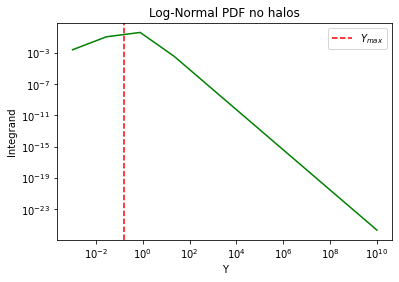

In [4]:
Y = np.geomspace(1e-3,1e10,len(m_1_list))

Y_list = Y.tolist()





integrand_list=np.zeros(len(Y_list))

for i, Y in enumerate(Y_list):
    integrand_list[i] = f2(Y)
    

plt.axvline(x = Y_max(m_1,m_2,Δ_1,Δ_2), color='r', linestyle='--')    
plt.loglog(Y_list,integrand_list,'g')

plt.xlabel('Y')
plt.ylabel('Integrand')
plt.legend(["$Y_{max}$"])
plt.title('Log-Normal PDF no halos')
plt.show()

In [9]:
def Y_max(m_1, m_2, Δ_1, Δ_2):
    
    λ_max = λ_list[-1]
    
    λ_0 = 0.001
    k = 22.5707
    A=((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)
    
    def s(λ_0): # S_dec of the binary decouple.
        return ((0.03095*λ_0 + 0.3425)*λ_0)
    
    def t(λ_0): 
        return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(λ_0)-2)*np.sqrt(s(λ_0)+1))+(4/3)))
    
    def ρ_bar(m):
        return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 
    
    def M_halo(m,λ_0):
        return (((16*π)/3)*ρ_bar(m)*((2*G*m*(t(λ_0)**2))**(1/4)))
    
    def M(m,λ_0):
        return (m + M_halo(m,λ_0))
    
    def M_binary_initial(m_1,m_2, λ_0):
        return (m_1 + m_2 + M_halo(m_1,λ_0) + M_halo(m_2,λ_0))
      
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    
    def X_max(m_1, m_2, Δ_1, Δ_2):
        return λ_max  * f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)
    
    
    def B(m_1,m_2,Δ_1,Δ_2):
        return (A**(1/7)) * ((M(m_1,λ_0) * M(m_2,λ_0) * t_m)**(1/7)) *  (M_binary_initial(m_1,m_2, λ_0)**(9/14)) *  ((m_1+m_2)**(-29/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 1.2005*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))
    

    return B(m_1,m_2,Δ_1,Δ_2) * ((X_max(m_1,m_2,Δ_1,Δ_2))**(-37/21))


print("Y_max=" ,Y_max(m_1_list[9],m_2_list[9],Δ_1_list[9],Δ_2_list[9])
    ) 
    




def integrand_halo(Y):
    λ_0=0.001
    k = 22.5707
    A=((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)
    
    def s(λ_0): # S_dec of the binary decouple.
        return ((0.03095*λ_0 + 0.3425)*λ_0)
    
    def t(λ_0): 
        return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(λ_0)-2)*np.sqrt(s(λ_0)+1))+(4/3)))
    
    def ρ_bar(m):
        return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 
    
    def M_halo(m,λ_0):
        return (((16*π)/3)*ρ_bar(m)*((2*G*m*(t(λ_0)**2))**(1/4)))
    
    def M(m,λ_0):
        return (m + M_halo(m,λ_0))
    
    def M_binary_initial(m_1,m_2, λ_0):
        return (m_1 + m_2 + M_halo(m_1,λ_0) + M_halo(m_2,λ_0))
      
    
    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def μ(m_1,m_2,Δ_1,Δ_2):
        return   (2 * m_1 * m_2 * f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))/((m_1+m_2) * ((f_(m_2)*Δ_2 * m_1) + (f_(m_1)*Δ_1 * m_2)))

    
    def B(m_1,m_2,Δ_1,Δ_2):
        return (A**(1/7)) * ((M(m_1,λ_0) * M(m_2,λ_0) * t_m)**(1/7)) *  (M_binary_initial(m_1,m_2, λ_0)**(9/14)) *  ((m_1+m_2)**(-29/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 1.2005*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))
    
    def D(m_1,m_2,Δ_1,Δ_2):
        return (B(m_1,m_2,Δ_1,Δ_2)**(21/37))/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))  
    
    def γ_X(Y,m_1,m_2,Δ_1,Δ_2):      #eq.(12) in the notes.
        return ((((1 + 0.0583 * D(m_1,m_2,Δ_1,Δ_2) * (Y**(-21/37)))**(-1/14))/( 1 + 0.4440 * D(m_1,m_2,Δ_1,Δ_2) * (Y**(-21/37))))*Y)

    def PDF(m):
        return (P(m)/m)

    I = quad(PDF, 5, np.inf)  # Taking limits of the PBH mass from 5 M☉ to 100 M☉ instead of 
                               # 0 to infinity.
    
    n_T = f * ρ_eq * I[0]         #n_T=f*ρ_eq∫(P(m)/m)*dm 
   
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
    
    
    
    return (Y**(-58/37))   *  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * ((Y/B(m_1,m_2,Δ_1,Δ_2))**(-21/37))) * ((γ_X(Y,m_1,m_2,Δ_1,Δ_2)**2)/ ((1 + (γ_X(Y,m_1,m_2,Δ_1,Δ_2)**2))**(3/2)))
    

    
g2=np.vectorize(integrand_halo)
    
    

Y_max= 0.18386224804071827


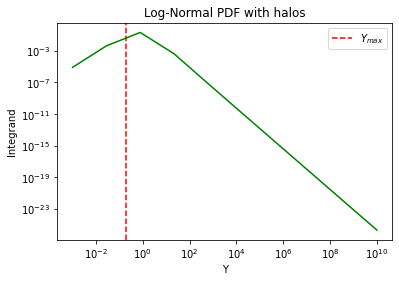

In [10]:
Y = np.geomspace(1e-3,1e10,len(m_1_list))

Y_list = Y.tolist()


f_pbh = 3.7e-3
f = 0.85*f_pbh 
        
def P(m):               #Log-Normal PBH mass Distribution
    σ=0.6
    m_c=15               #in units of M☉
    return  np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))/(σ*m*np.sqrt(2*π))



integrand_list=np.zeros(len(Y_list))

for i, Y in enumerate(Y_list):
    integrand_list[i] = g2(Y)
    

plt.axvline(x = Y_max(m_1,m_2,Δ_1,Δ_2), color='r', linestyle='--')    
plt.loglog(Y_list,integrand_list,'g')

plt.xlabel('Y')
plt.ylabel('Integrand')
plt.title('Log-Normal PDF with halos')
plt.legend(["$Y_{max}$"])
plt.show()